In [63]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
%matplotlib inline
import seaborn as sns

In [64]:
# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()

In [3]:
# colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
#           'destination', 'request_agent']
# df_orig = pd.read_csv('anonymized-curriculum-access.txt',          
#                  engine='python',
#                  header=None,
#                  index_col=False,
#                  names=colnames,
#                  sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
#                  na_values='"-"',
#                  usecols=[0, 3, 4, 5, 6, 7, 8]
# )

In [4]:
df = pd.read_csv('curriculum.txt',
                engine='python',
                 header=None,
                 index_col=False,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',)




In [5]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [6]:
df.columns = ['date', 'time', 'page_viewed', 'user_id', 'cohort_id', 'ip']

In [7]:
df.head()

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719459 entries, 0 to 719458
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         719459 non-null  object 
 1   time         719459 non-null  object 
 2   page_viewed  719458 non-null  object 
 3   user_id      719459 non-null  int64  
 4   cohort_id    674619 non-null  float64
 5   ip           719459 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 32.9+ MB


In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674618 entries, 0 to 719458
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         674618 non-null  object 
 1   time         674618 non-null  object 
 2   page_viewed  674618 non-null  object 
 3   user_id      674618 non-null  int64  
 4   cohort_id    674618 non-null  float64
 5   ip           674618 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 36.0+ MB


In [12]:
df.dropna(inplace=True)
df.cohort_id = df.cohort_id.astype('int')
df['date'] = df.date + " " + df.time
df.drop(columns=('time'), inplace=True)
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

In [13]:
df.head()

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26 09:55:03,09:55:03,/,1,8,97.105.19.61
1,2018-01-26 09:56:02,09:56:02,java-ii,1,8,97.105.19.61
2,2018-01-26 09:56:05,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
3,2018-01-26 09:56:06,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
4,2018-01-26 09:56:24,09:56:24,javascript-i/conditionals,2,22,97.105.19.61


In [14]:
df.drop(columns=('time'), inplace=True)

In [15]:
df.head()

,date,page_viewed,user_id,cohort_id,ip
0,2018-01-26 09:55:03,/,1,8,97.105.19.61
1,2018-01-26 09:56:02,java-ii,1,8,97.105.19.61
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
3,2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
4,2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61


In [16]:
df['page_viewed'].value_counts()

/                                                    36074
javascript-i                                         13912
search/search_index.json                             13602
toc                                                  13413
java-iii                                             10614
                                                     ...  
teams/13                                                 1
content/jquery/effects/gitbook/images/favicon.ico        1
6_Ensemble                                               1
content/examples/javascript/conditionals.html            1
further-reading/javascript/array-splice                  1
Name: page_viewed, Length: 2060, dtype: int64

In [17]:
def compute_entropy(series):
    counts = series.value_counts()
    if len(counts)==1:
        ent = 0
    else:
        value, counts = np.unique(series, return_counts=True)
        ent = entropy(counts, base=None)
    return ent

In [18]:
compute_entropy(df.ip)

4.198666302653029

In [19]:
compute_entropy(df.cohort_id)

3.2014554018220913

In [20]:
df.date.value_counts()

2019-03-03 22:52:09    30
2019-03-03 22:52:07    30
2019-03-03 22:52:10    25
2019-03-03 22:52:08    25
2019-03-03 22:52:11    25
                       ..
2020-03-08 19:37:36     1
2020-07-28 21:45:03     1
2020-03-11 14:30:40     1
2018-10-25 13:53:41     1
2018-11-12 12:14:52     1
Name: date, Length: 645882, dtype: int64

In [21]:
df.date = pd.to_datetime(df.date)

In [22]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')


In [23]:
df['user_id'].value_counts()

11     14870
64     14419
53     10874
1       6440
314     6419
       ...  
651        1
593        1
163        1
592        1
652        1
Name: user_id, Length: 719, dtype: int64

In [24]:
df['cohort_id'].value_counts()

28    60315
33    40168
29    37548
53    36047
24    35624
57    32447
56    31670
22    30328
51    29688
58    28354
32    28333
23    28329
26    27637
52    27518
25    25427
31    25253
34    25181
59    22425
27    20447
55    20410
61    11774
14     9495
1      8884
62     8718
21     7444
17     4925
13     2733
18     2005
8      1712
19     1165
16      743
15      691
7       495
12      302
11      208
2        93
6        72
9         5
4         4
5         1
Name: cohort_id, dtype: int64

In [25]:
new_df = df[['cohort_id']]

In [26]:
new_df.head()

,cohort_id
date,
2018-01-26 09:55:03,8
2018-01-26 09:56:02,8
2018-01-26 09:56:05,8
2018-01-26 09:56:06,8
2018-01-26 09:56:24,22


In [27]:
new_df.resample('W').sum()

,cohort_id
date,
2018-01-28,19006
2018-02-04,81266
2018-02-11,59614
2018-02-18,53504
2018-02-25,63105
...,...
2020-10-11,316654
2020-10-18,295532
2020-10-25,313676


In [41]:
train = df[:'2019-12-31 22:52:12 ']
validate = df['2019-12-31 22:52:13':'2020-02-01 00:00:00']
test = df['2020-02-01 00:00:01':]

In [42]:
train.shape, validate.shape, test.shape

((394751, 4), (22020, 4), (257847, 4))

In [43]:
# plt.figure(figsize=(12, 8))
# plt.plot(train)
# plt.plot(validate)
# plt.plot(test)
# plt.show()

In [31]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_count'})
ip_df2 = pd.DataFrame(df.ip.value_counts(dropna=False)/df.ip.count()).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_proba'})
ip_df = ip_df.merge(ip_df2)

In [32]:
ip_df[ip_df.ip_proba < .01]


,ip,ip_count,ip_proba
3,71.150.217.33,4919,0.007292
4,12.106.208.194,4262,0.006318
5,76.185.145.231,3852,0.005710
6,172.124.67.93,3511,0.005204
7,24.243.67.104,3166,0.004693
...,...,...,...
4043,174.207.0.177,1,0.000001
4044,172.58.109.223,1,0.000001
4045,172.223.38.19,1,0.000001
4046,70.94.161.227,1,0.000001


In [38]:
# print(len(ip_df))

# print(ip_df.tail(10))

# plt.figure(figsize=(12, 4))
# splot = sns.barplot(data=ip_df, x = 'ip', y = 'ip_count', ci = None)
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', xytext = (0, 10), 
#                    textcoords = 'offset points'
#                    )
#     plt.xticks(rotation='vertical')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 394751 entries, 2018-01-26 09:55:03 to 2019-12-31 22:06:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   cohort_id  394751 non-null  int64
dtypes: int64(1)
memory usage: 6.0 MB


In [44]:
ip_df = pd.DataFrame(train.ip.value_counts(dropna=False)/train.ip.count()).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_proba'})

In [45]:
ip_df

,ip,ip_proba
0,97.105.19.58,0.576257
1,97.105.19.61,0.153337
2,192.171.117.210,0.020357
3,70.122.40.62,0.003389
4,66.69.108.117,0.003037
...,...,...
2535,174.255.186.213,0.000003
2536,107.77.221.72,0.000003
2537,159.192.201.107,0.000003
2538,107.77.64.51,0.000003


In [47]:
df = df.reset_index().merge(ip_df, on=['ip'], how='left').fillna(value=0).set_index('date')
df.ip_proba.value_counts()

0.576257    268648
0.000000    198176
0.153337     60530
0.020357      8896
0.000073      4860
             ...  
0.000253       100
0.000231        91
0.000213        88
0.000218        86
0.000193        82
Name: ip_proba, Length: 278, dtype: int64

In [48]:
df.head()

,page_viewed,user_id,cohort_id,ip,ip_proba
date,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,0.153337
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,0.153337
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,0.153337
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,0.153337
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,0.153337


In [57]:
df.ip_proba.value_counts()

0.576257    268648
0.000000    198176
0.153337     60530
0.020357      8896
0.000073      4860
             ...  
0.000253       100
0.000231        91
0.000213        88
0.000218        86
0.000193        82
Name: ip_proba, Length: 278, dtype: int64

In [54]:
ip_probs = df.groupby('ip').size().div(len(df))

cohort_given_ip = pd.DataFrame(df.groupby(['ip', 'cohort_id']).\
                               size().div(len(df)).\
                               div(ip_probs, 
                                   axis=0, 
                                   level='ip').\
                               reset_index().\
                               rename(index=str, 
                                      columns={0: 'proba_cohort_given_ip'})
                              )

In [55]:
cohort_given_ip.head()

,ip,cohort_id,proba_cohort_given_ip
0,100.11.170.135,58,1.0
1,100.19.73.35,58,1.0
2,100.35.67.162,21,1.0
3,103.137.12.164,34,1.0
4,104.1.46.153,23,1.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 674618 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   page_viewed  674618 non-null  object 
 1   user_id      674618 non-null  int64  
 2   cohort_id    674618 non-null  int64  
 3   ip           674618 non-null  object 
 4   ip_proba     674618 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 30.9+ MB


In [58]:
df = df.reset_index().merge(cohort_given_ip, on=['ip', 'cohort_id'], how='left').fillna(value=0).set_index('date')


In [59]:
df.head()

,page_viewed,user_id,cohort_id,ip,ip_proba,proba_cohort_given_ip
date,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,0.153337,0.016785
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,0.153337,0.016785
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,0.153337,0.016785
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,0.153337,0.016785
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,0.153337,0.333570


In [60]:
df['proba_cohort_given_ip'].value_counts()

1.000000    284441
0.100328     26953
0.089861     24141
0.087821     23593
0.080042     21503
             ...  
0.001222         1
0.011236         1
0.012346         1
0.041667         1
0.035714         1
Name: proba_cohort_given_ip, Length: 529, dtype: int64

In [61]:
df[df['proba_cohort_given_ip'] == 1]

,page_viewed,user_id,cohort_id,ip,ip_proba,proba_cohort_given_ip
date,,,,,,
2018-01-26 10:59:02,index.html,21,16,71.137.146.71,0.000091,1.0
2018-01-26 10:59:06,java-i,21,16,71.137.146.71,0.000091,1.0
2018-01-26 12:20:36,javascript-i/javascript-with-html,34,22,209.205.123.242,0.000013,1.0
2018-01-26 12:20:41,javascript-i/functions,34,22,209.205.123.242,0.000013,1.0
2018-01-26 16:00:29,javascript-i/introduction/working-with-data-ty...,34,22,209.205.123.242,0.000013,1.0
...,...,...,...,...,...,...
2020-11-02 16:48:13,javascript-i/coffee-project,763,62,107.192.148.199,0.000000,1.0
2020-11-02 16:48:17,javascript-i/mapbox-api,771,62,172.125.226.175,0.000000,1.0
2020-11-02 16:48:18,javascript-i/coffee-project,771,62,172.125.226.175,0.000000,1.0


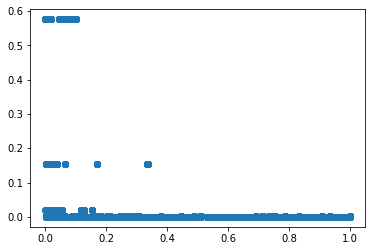

In [62]:
plt.scatter(df.proba_cohort_given_ip, df.ip_proba)


In [65]:
df = pd.read_csv('curriculum.txt',
                engine='python',
                 header=None,
                 index_col=False,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',)


In [66]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [67]:
df.columns = ['date', 'time', 'page_viewed', 'user_id', 'cohort_id', 'ip']

In [68]:
df.head()

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [69]:
df.dropna(inplace=True)
df.cohort_id = df.cohort_id.astype('int')
df['date'] = df.date + " " + df.time
df.drop(columns=('time'), inplace=True)
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

In [70]:
df.head()

,page_viewed,user_id,cohort_id,ip
date,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61


In [71]:
df.groupby(['cohort_id', 'user_id']).page_viewed.agg('count')

cohort_id  user_id
1          11         2735
           60          517
           64         3767
           95            9
           141           9
                      ... 
62         772          26
           773         345
           774         362
           775         237
           776         365
Name: page_viewed, Length: 748, dtype: int64

In [72]:
df.cohort_id.value_counts()

28    60315
33    40168
29    37548
53    36047
24    35624
57    32447
56    31670
22    30328
51    29688
58    28354
32    28333
23    28329
26    27637
52    27518
25    25427
31    25253
34    25181
59    22425
27    20447
55    20410
61    11774
14     9495
1      8884
62     8718
21     7444
17     4925
13     2733
18     2005
8      1712
19     1165
16      743
15      691
7       495
12      302
11      208
2        93
6        72
9         5
4         4
5         1
Name: cohort_id, dtype: int64

In [73]:
new_df = df[df.cohort_id == 28]

In [74]:
new_df.shape

(60315, 4)

In [76]:
new_df.groupby(['user_id']).page_viewed.agg('count').sort_values(ascending=False)

user_id
11     12135
64     10627
1       4823
428     4505
248     3868
314     3253
211     2896
53      2677
545     2568
514     2043
546     2011
404     1668
315     1335
146     1216
521     1088
742      711
480      412
37       374
502      349
572      343
397      305
618      240
41       196
257      160
312      131
738       79
539       75
653       74
40        66
370       54
620       24
461        6
652        1
592        1
745        1
Name: page_viewed, dtype: int64

In [77]:
new_df.head()

,page_viewed,user_id,cohort_id,ip
date,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28,97.105.19.58
2018-12-06 14:25:40,javascript-i,314,28,97.105.19.58
2018-12-06 14:25:41,javascript-i/coffee-project,314,28,97.105.19.58
2018-12-06 15:31:29,spring,40,28,170.248.173.247
2018-12-06 15:31:33,spring/fundamentals/security,40,28,170.248.173.247


<AxesSubplot:xlabel='date'>

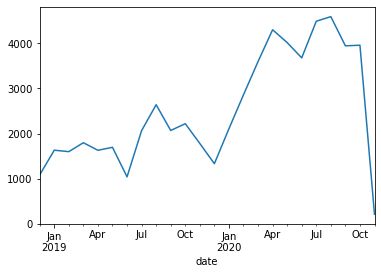

In [79]:
new_df.resample('M').user_id.agg('count').plot()

In [80]:
newer_df = new_df[new_df.user_id == 11]

In [81]:
newer_df.shape

(12135, 4)

<AxesSubplot:xlabel='date'>

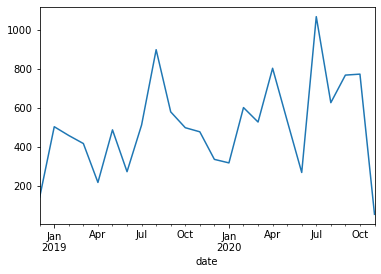

In [88]:
newer_df.resample('M').page_viewed.agg('count').plot()

In [83]:
newer_df.index.max()

Timestamp('2020-11-02 16:42:06')

In [84]:
newer_df.index.min()

Timestamp('2018-12-07 09:05:02')

<AxesSubplot:xlabel='date'>

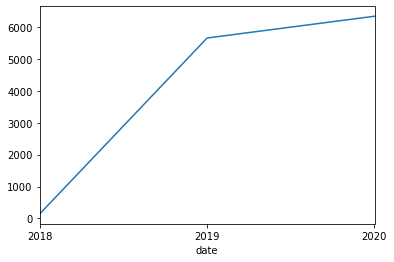

In [89]:
newer_df.resample('Y').page_viewed.agg('count').plot()

<AxesSubplot:xlabel='date'>

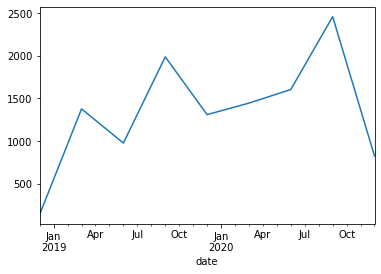

In [90]:
newer_df.resample('3M').page_viewed.agg('count').plot()

<AxesSubplot:xlabel='date'>

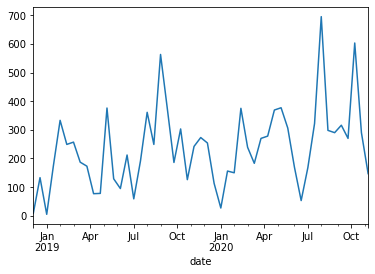

In [91]:
newer_df.resample('2W').page_viewed.agg('count').plot()

In [92]:
newer_df.ip.value_counts()

97.105.19.58       5995
76.185.145.231     3852
76.185.131.226     1897
76.185.142.244      238
76.185.152.58        71
72.128.136.219       23
192.171.117.210      11
72.181.121.84        11
67.164.150.90        11
75.1.201.239          9
208.54.83.145         4
208.54.83.163         2
144.178.1.46          2
75.54.33.188          2
99.203.143.2          1
99.203.26.9           1
99.203.27.231         1
99.203.155.182        1
99.203.155.78         1
208.54.83.234         1
172.56.15.51          1
Name: ip, dtype: int64